In [ ]:
from pathlib import Path
from models import ShoeClassifier
from utils import get_dataloader
from datasets import get_shoe_dataset


class ArgsClass:
    batch = 1
    workers = 1


model_path = (
    Path("..")
    / "logs"
    / "classifier_2"
    / "version_0"
    / "checkpoints"
    / "epoch=7-step=16.ckpt"
)
model = ShoeClassifier().load_from_checkpoint(model_path)
data_path = Path("..") / "data" / "Shoes"
val_dataset = get_shoe_dataset(str(data_path / "test"))
args = ArgsClass()
val_loader = get_dataloader(val_dataset, args)

In [2]:
from torch import no_grad

results = []
model.eval()
with no_grad():
    for img, label in val_loader:
        y_hat = model(img)
        results.append([img.reshape(28, 28), label.item(), y_hat.item()])
del model
del val_loader
del val_dataset

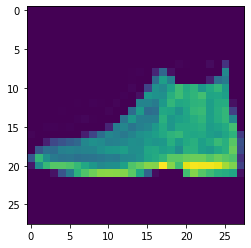

label: flat | model_pred (thr:0.5): flat | model_out: 0.19949065148830414


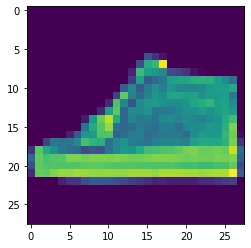

label: flat | model_pred (thr:0.5): flat | model_out: 0.0958622395992279


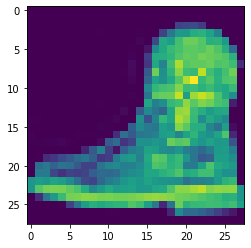

label: flat | model_pred (thr:0.5): flat | model_out: 0.3665965795516968


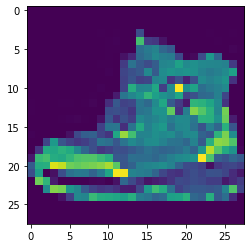

label: flat | model_pred (thr:0.5): flat | model_out: 0.38252902030944824


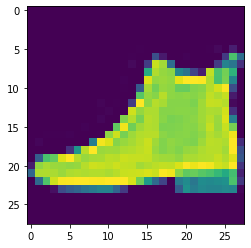

label: flat | model_pred (thr:0.5): flat | model_out: 0.27541589736938477


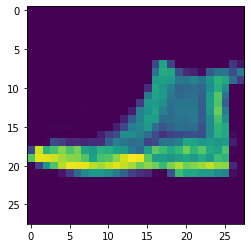

label: flat | model_pred (thr:0.5): flat | model_out: 0.15488192439079285


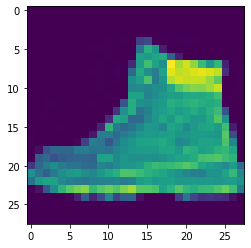

label: flat | model_pred (thr:0.5): flat | model_out: 0.47338175773620605


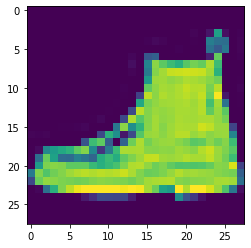

label: flat | model_pred (thr:0.5): flat | model_out: 0.26071813702583313


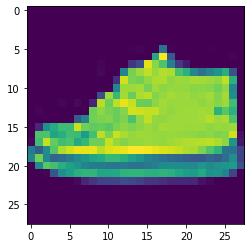

label: flat | model_pred (thr:0.5): flat | model_out: 0.08643504977226257


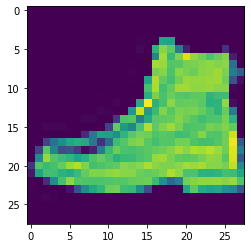

label: flat | model_pred (thr:0.5): flat | model_out: 0.30709224939346313


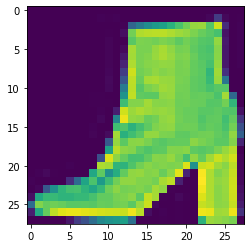

label: heel | model_pred (thr:0.5): heel | model_out: 0.7787947058677673


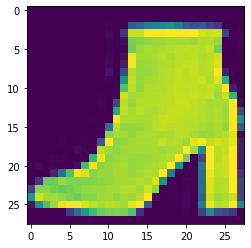

label: heel | model_pred (thr:0.5): heel | model_out: 0.826010525226593


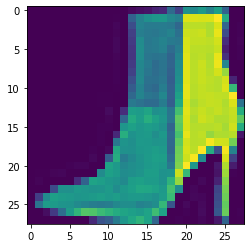

label: heel | model_pred (thr:0.5): heel | model_out: 0.5541948676109314


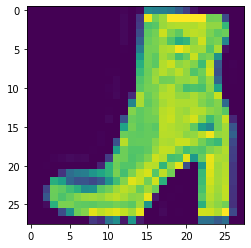

label: heel | model_pred (thr:0.5): heel | model_out: 0.5708189606666565


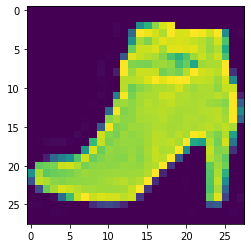

label: heel | model_pred (thr:0.5): heel | model_out: 0.8103496432304382


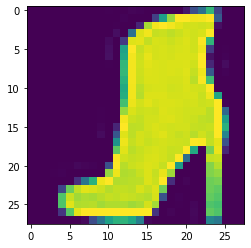

label: heel | model_pred (thr:0.5): heel | model_out: 0.8645592927932739


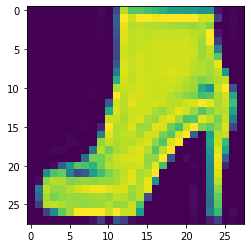

label: heel | model_pred (thr:0.5): heel | model_out: 0.9530649781227112


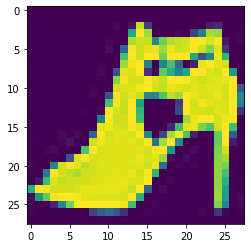

label: heel | model_pred (thr:0.5): heel | model_out: 0.8460241556167603


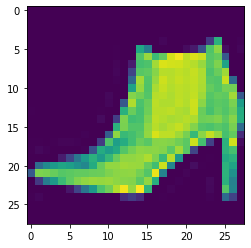

label: heel | model_pred (thr:0.5): heel | model_out: 0.5719175338745117


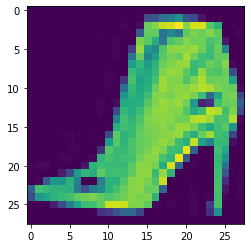

label: heel | model_pred (thr:0.5): heel | model_out: 0.8183653950691223


In [3]:
import matplotlib.pyplot as plt

thr = 0.5
for result in results:
    plt.imshow(result[0])
    plt.show()
    label = "flat" if result[1] == 0 else "heel"
    model_pred = "flat" if result[2] < thr else "heel"
    print(
        f"label: {label} | model_pred (thr:{thr}): {model_pred} | model_out: {result[2]}"
    )